# LESSON 9

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
samples, categories = make_blobs(
    n_samples=350,
    n_features=2,
    centers=4,
    cluster_std=1.2,
    random_state=42
)

df = pd.DataFrame(samples, columns=["Feature_A", "Feature_B"])
df["Group"] = categories

print("Dataset:")
df.head()


Dataset:


,Feature_A,Feature_B,Group
0,-2.392705,10.176660,0
1,-9.786897,7.889285,3
2,-0.245775,9.223780,0
3,-6.025689,-8.229680,2
4,6.206453,1.998374,1


In [4]:
kmodel = KMeans(
    n_clusters=4,
    init="k-means++",
    max_iter=400,
    n_init=15,
    random_state=99
)

kmodel.fit(samples)

predicted_groups = kmodel.labels_
centroids = kmodel.cluster_centers_

print("Cluster centroids:")
centroids


Cluster centroids:


C:\Users\Euwen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([[-8.89092302,  7.33646378],
       [ 4.73715175,  1.94839708],
       [-6.91986004, -6.92903728],
       [-2.64438682,  9.06386897]])

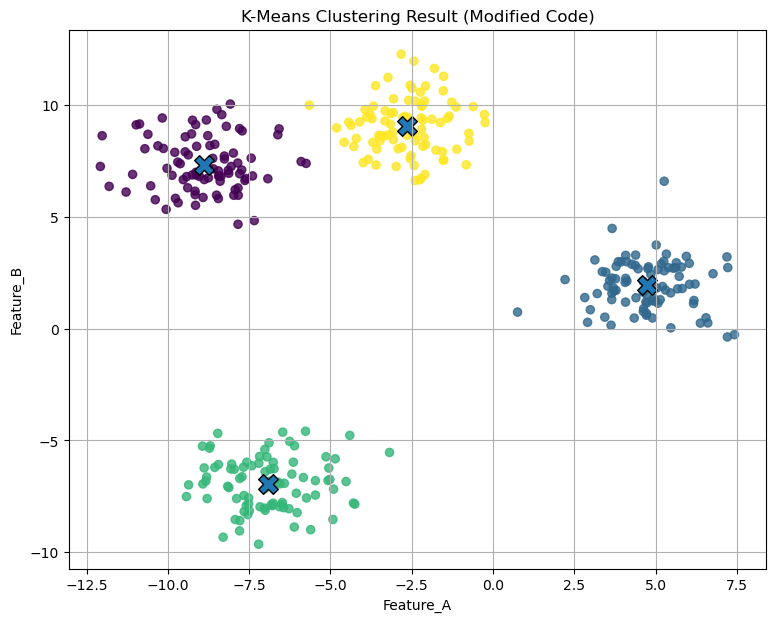

In [5]:
plt.figure(figsize=(9, 7))

plt.scatter(
    samples[:, 0],
    samples[:, 1],
    c=predicted_groups,
    s=35,
    alpha=0.8
)

# plot centroids
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="X",
    s=200,
    edgecolor="black"
)

plt.title("K-Means Clustering Result (Modified Code)")
plt.xlabel("Feature_A")
plt.ylabel("Feature_B")
plt.grid(True)
plt.show()
